## Goal of the report

### The primary goal of this report is to forecast the median house value based on three independent values namely the population, median income and the number of households, the report is to design and asses three univerate linear regression models that predict median house value. We are looking to explain each independent's variables ability to explain and predict the median house value by working on a model for each. The conclusion will contain our findings and which model predict most accurately

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

## Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [26]:
housing = pd.read_csv('../data/housing.csv')

## Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [27]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


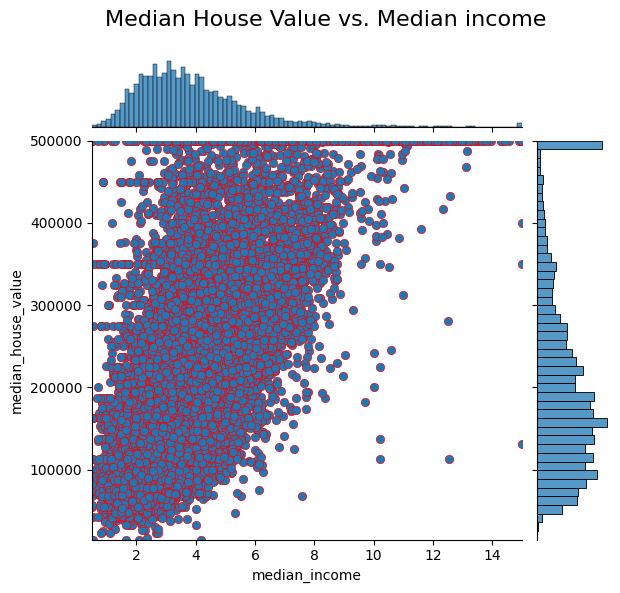

In [28]:
g = sns.jointplot(x="median_income", y="median_house_value", data=housing, kind='scatter', edgecolor="red")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median House Value vs. Median income', fontsize=16)

g.ax_joint.set_xlim(housing['median_income'].min(), housing['median_income'].max())
g.ax_joint.set_ylim(housing['median_house_value'].min(), housing['median_house_value'].max())

plt.show()

In [29]:
housing_preprocessed = housing[housing.median_house_value != 500001]
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


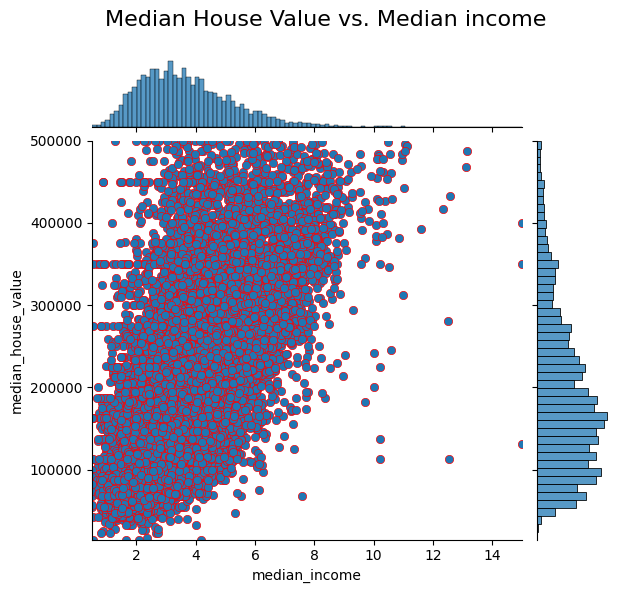

In [30]:
g = sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed, kind='scatter', edgecolor="red")

# title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median House Value vs. Median income', fontsize=16)

# Highlights
g.ax_joint.set_xlim(housing_preprocessed['median_income'].min(), housing_preprocessed['median_income'].max())
g.ax_joint.set_ylim(housing_preprocessed['median_house_value'].min(), housing_preprocessed['median_house_value'].max())

plt.show()

# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [31]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot


<Axes: xlabel='median_income', ylabel='median_house_value'>

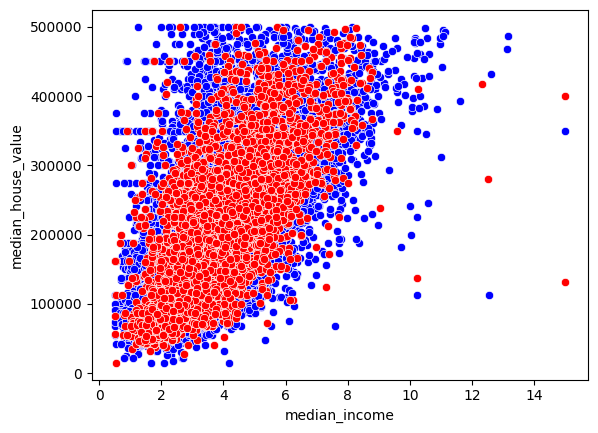

In [32]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

## Median House Value against Median Income

### Based on the graph plotted above we can see a clear correlation between how the median income tends to have a strong influence on the median house value. It depicts that as there is an increase in the median income it is causing an equal increase in the house value, depicting that areas with a higher income would have houses with higher house values. We are also expecting the linear regression models between these two variables to correlate.

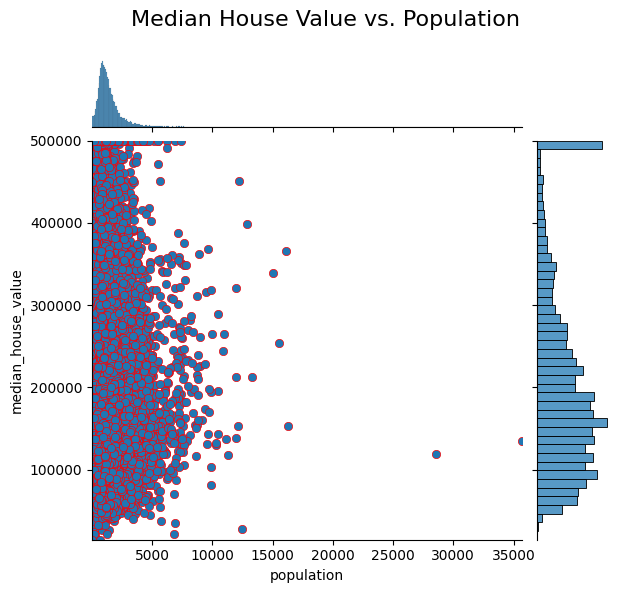

In [33]:
g = sns.jointplot(x="population", y="median_house_value", data=housing, kind='scatter', edgecolor="red")

# title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median House Value vs. Population', fontsize=16)

# Highlight 
g.ax_joint.set_xlim(housing['population'].min(), housing['population'].max())
g.ax_joint.set_ylim(housing['median_house_value'].min(), housing['median_house_value'].max())

plt.show()

In [34]:
housing_preprocessed = housing[housing.median_house_value != 500001]
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


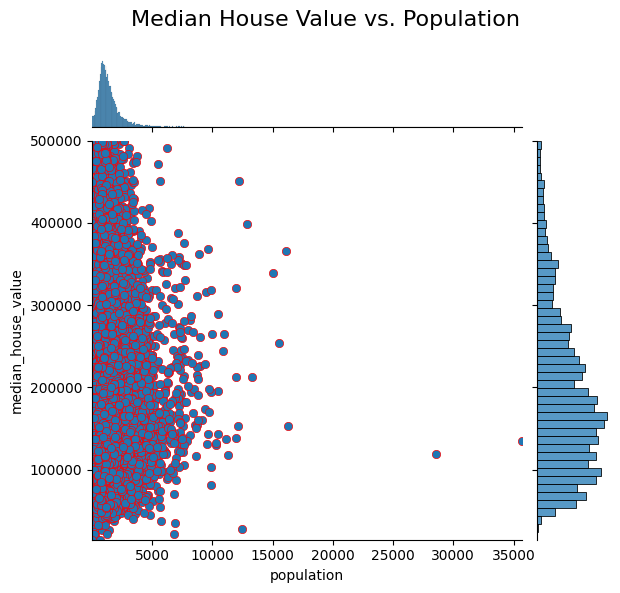

In [35]:
g = sns.jointplot(x="population", y="median_house_value", data=housing_preprocessed, kind='scatter', edgecolor="red")

# title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median House Value vs. Population', fontsize=16)

# Highlight
g.ax_joint.set_xlim(housing_preprocessed['population'].min(), housing_preprocessed['population'].max())
g.ax_joint.set_ylim(housing_preprocessed['median_house_value'].min(), housing_preprocessed['median_house_value'].max())

plt.show()

# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [36]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

<Axes: xlabel='population', ylabel='median_house_value'>

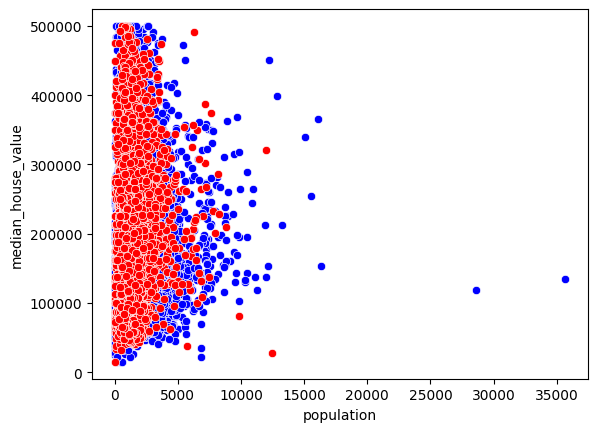

In [37]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

## Median House Value against Population

###  Given the dispersion of the data points, it shows that there is no clear correlation between population size and house value.We can't see any obvious pattern or trend depicted by the scatter plot diagram. Therefore, we anticipate a minor correlation for this pair in the linear regression model.


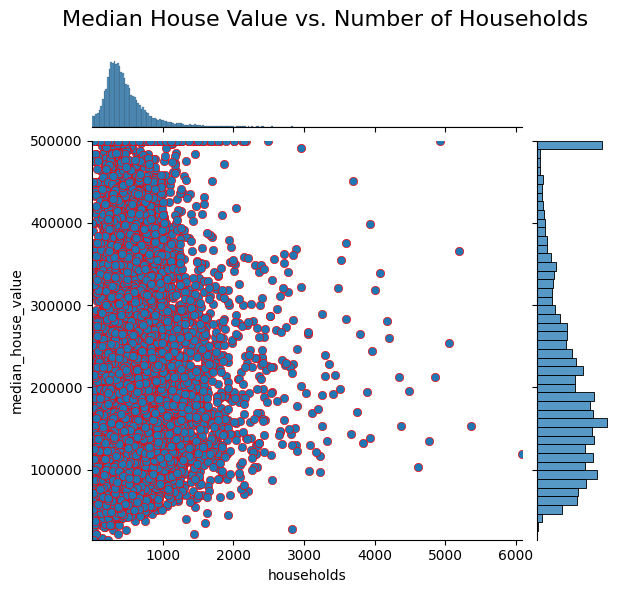

In [38]:
g = sns.jointplot(x="households", y="median_house_value", data=housing, kind='scatter', edgecolor="red", marker='o')

g.fig.subplots_adjust(top=0.9)  # Adjust the top to make space for the title

# title
g.fig.suptitle('Median House Value vs. Number of Households', fontsize=16)

g.ax_joint.set_xlim(housing['households'].min(), housing['households'].max())
g.ax_joint.set_ylim(housing['median_house_value'].min(), housing['median_house_value'].max())

plt.show()

In [39]:
housing_preprocessed = housing[housing.median_house_value != 500001]
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


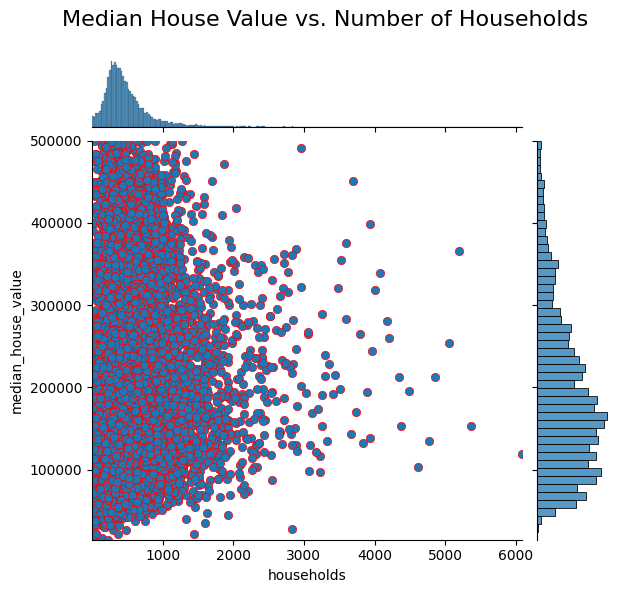

In [40]:
g = sns.jointplot(x="households", y="median_house_value", data=housing_preprocessed, kind='scatter', edgecolor="red")

# title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Median House Value vs. Number of Households', fontsize=16)

# Highlight
g.ax_joint.set_xlim(housing_preprocessed['households'].min(), housing_preprocessed['households'].max())
g.ax_joint.set_ylim(housing_preprocessed['median_house_value'].min(), housing_preprocessed['median_house_value'].max())

plt.show()

# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [41]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

<Axes: xlabel='households', ylabel='median_house_value'>

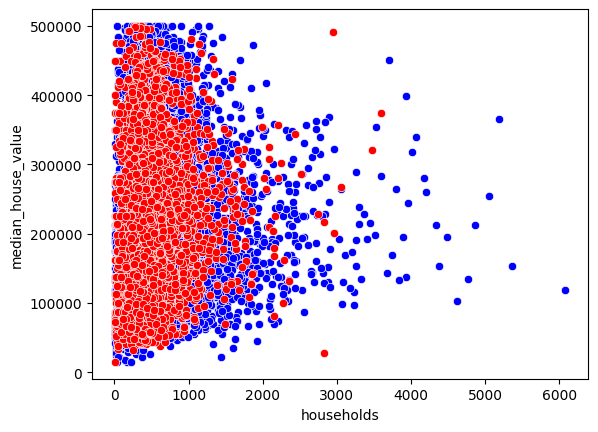

In [42]:

sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

## Median House Value against Number of house holds

###  The median house value rises slightly as the number of households rises, keep in mind this connection is not as strong as it is for median income. This depicts that while the number of households may have some predictive value, it will probably have less accuracy than the linear regression model's median income.


## Brief on each variable

### Median House Value (Dependent)

#### This is used to represent the median house value (prices) in a particular area. It has been shown to range from $14,000 to $500,000.Considering the independent characteristics there is a significant variance in home prices between various localities.


### Median Income (Independent)

#### This is used to represent the median income of a particular area. It has been shown to range from 0 to 15 (Possibly in tens of thousand of dollars),it has a shown positive correlation with house value, which makes it an important regression model predictor.


### Population (Independent)

#### This is used to show the total popluation in a particular area. It has  shown to range from 3 to 35,000,though the graph shows a wide regional variations in population size, house prices in this dataset are not significantly impacted by it.

### Number of Households (Independent)

#### This is used to show the total number of households in a particular area. It has shown to range from approxiately 1 to 6,000, has a somewhat positive correlation with home value, suggesting that the presence of more families in a neighbourhood may raise property values.





# Define a Model

Create a linear regression object

In [43]:
# Fit the model for Median House Value vs. Median Income
model_income = linear_model.LinearRegression()
model_income.fit(X=train[["median_income"]], y=train[["median_house_value"]])
income_coef = model_income.coef_[0]
income_intercept = model_income.intercept_
y_pred_income = model_income.predict(X=train[["median_income"]])

# Fit the model for Median House Value vs. Population
model_population = linear_model.LinearRegression()
model_population.fit(X=train[["population"]], y=train[["median_house_value"]])
population_coef = model_population.coef_[0]
population_intercept = model_population.intercept_
y_pred_population = model_population.predict(X=train[["population"]])

# Fit the model for Median House Value vs. Number of Households
model_households = linear_model.LinearRegression()
model_households.fit(X=train[["households"]], y=train[["median_house_value"]])
households_coef = model_households.coef_[0]
households_intercept = model_households.intercept_
y_pred_households = model_households.predict(X=train[["households"]])

# Calculate errors
mse_income = mean_squared_error(train["median_house_value"], y_pred_income)
mae_income = mean_absolute_error(train["median_house_value"], y_pred_income)

mse_population = mean_squared_error(train["median_house_value"], y_pred_population)
mae_population = mean_absolute_error(train["median_house_value"], y_pred_population)

mse_households = mean_squared_error(train["median_house_value"], y_pred_households)
mae_households = mean_absolute_error(train["median_house_value"], y_pred_households)

results = {
    'Model': ['Income', 'Population', 'Households'],
    'Intercept': [income_intercept, population_intercept, households_intercept],
    'Slope': [income_coef, population_coef, households_coef],
    'Mean Squared Error': [mse_income, mse_population, mse_households],
    'Mean Absolute Error': [mae_income, mae_population, mae_households]
}

results_df = pd.DataFrame(results)

print(results_df)


        Model             Intercept                 Slope  Mean Squared Error  \
0      Income   [48204.53436816973]  [38702.972338423795]        5.557954e+09   
1  Population  [188081.58862583563]  [0.3286297271249774]        9.236186e+09   
2  Households   [177147.2885383485]  [22.625725908661146]        9.156895e+09   

   Mean Absolute Error  
0         55839.998641  
1         75879.526606  
2         75463.106515  


In [44]:
model_income.predict(X=[[12],[1],[100]])

/Users/elder/Desktop/ml_ai_2024/cscn8010/CSCN8010_CLASSICAL_ML/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242926],
       [  86907.50670659],
       [3918501.76821055]])

In [45]:
model_population.predict(X=[[500],[10000],[100000]])

/Users/elder/Desktop/ml_ai_2024/cscn8010/CSCN8010_CLASSICAL_ML/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[188245.9034894 ],
       [191367.88589709],
       [220944.56133833]])

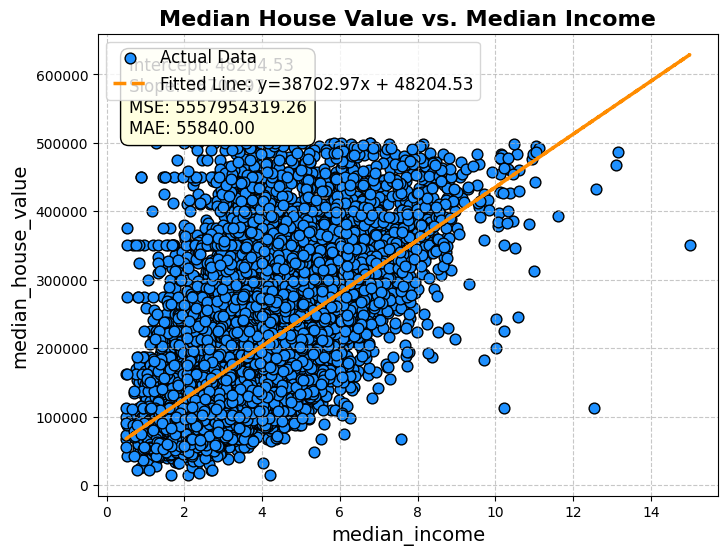

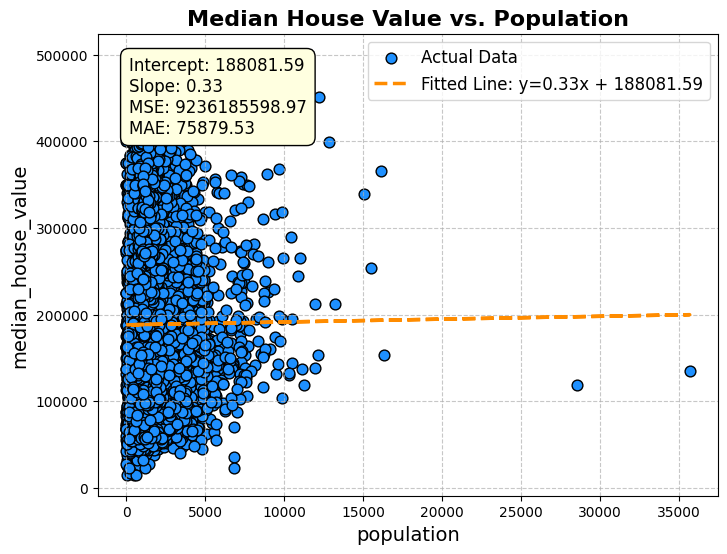

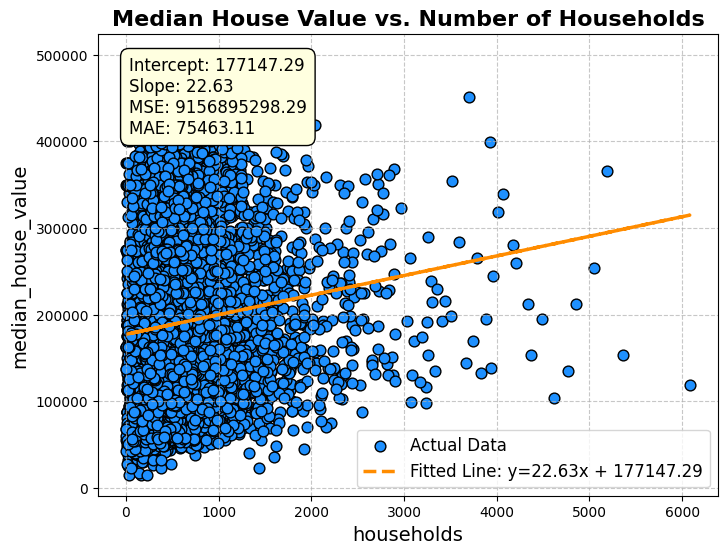

In [46]:
def plot_model_fixed(train, x_col, y_col, y_pred, intercept, slope, mse, mae, title):
    plt.figure(figsize=(8,6))
    
    plt.scatter(train[x_col], train[y_col], color="dodgerblue", marker='o', s=60, label="Actual Data", edgecolor='black')
    
    plt.plot(train[x_col], y_pred, color="darkorange", linestyle='--', linewidth=2.5, label=f"Fitted Line: y={slope:.2f}x + {intercept:.2f}")
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)

    textstr = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}'
    
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightyellow'))
    
    plt.show()

# Plot for Median House Value vs. Median Income
plot_model_fixed(train, "median_income", "median_house_value", y_pred_income, income_intercept[0], income_coef[0], mse_income, mae_income, "Median House Value vs. Median Income")

# Plot for Median House Value vs. Population
plot_model_fixed(train, "population", "median_house_value", y_pred_population, population_intercept[0], population_coef[0], mse_population, mae_population, "Median House Value vs. Population")

# Plot for Median House Value vs. Number of Households
plot_model_fixed(train, "households", "median_house_value", y_pred_households, households_intercept[0], households_coef[0], mse_households, mae_households, "Median House Value vs. Number of Households")

In [47]:
# Fit the model for Median House Value vs. Median Income on test data
mse_income = mean_squared_error(test[["median_house_value"]], model_income.predict(test[["median_income"]]))
mae_income = mean_absolute_error(test[["median_house_value"]], model_income.predict(test[["median_income"]]))

# Fit the model for Median House Value vs. Population on test data
mse_population = mean_squared_error(test[["median_house_value"]], model_population.predict(test[["population"]]))
mae_population = mean_absolute_error(test[["median_house_value"]], model_population.predict(test[["population"]]))

# Fit the model for Median House Value vs. Number of Households on test data
mse_households = mean_squared_error(test[["median_house_value"]], model_households.predict(test[["households"]]))
mae_households = mean_absolute_error(test[["median_house_value"]], model_households.predict(test[["households"]]))

results_test = {
    'Model': ['Income', 'Population', 'Households'],
    'Intercept': [model_income.intercept_[0], model_population.intercept_[0], model_households.intercept_[0]],
    'Slope': [model_income.coef_[0], model_population.coef_[0], model_households.coef_[0]],
    'Mean Squared Error': [mse_income, mse_population, mse_households],
    'Mean Absolute Error': [mae_income, mae_population, mae_households]
}

results_test_df = pd.DataFrame(results_test)

print(results_test_df)


        Model      Intercept                 Slope  Mean Squared Error  \
0      Income   48204.534368  [38702.972338423795]        5.831038e+09   
1  Population  188081.588626  [0.3286297271249774]        1.086378e+10   
2  Households  177147.288538  [22.625725908661146]        1.075928e+10   

   Mean Absolute Error  
0         59961.600991  
1         85178.908981  
2         84503.147235  


/var/folders/84/15smpvhx2g139bpl52zzz9200000gn/T/ipykernel_89067/479650061.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_model_fixed(test, "median_income", "median_house_value", model_income, float(income_intercept), float(income_coef), "Median House Value vs. Median Income (Test Data)")


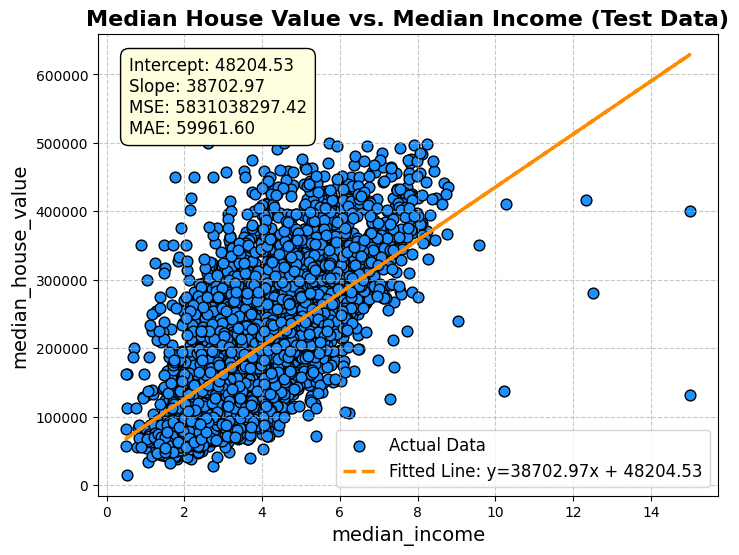

/var/folders/84/15smpvhx2g139bpl52zzz9200000gn/T/ipykernel_89067/479650061.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_model_fixed(test, "population", "median_house_value", model_population, float(population_intercept), float(population_coef), "Median House Value vs. Population (Test Data)")


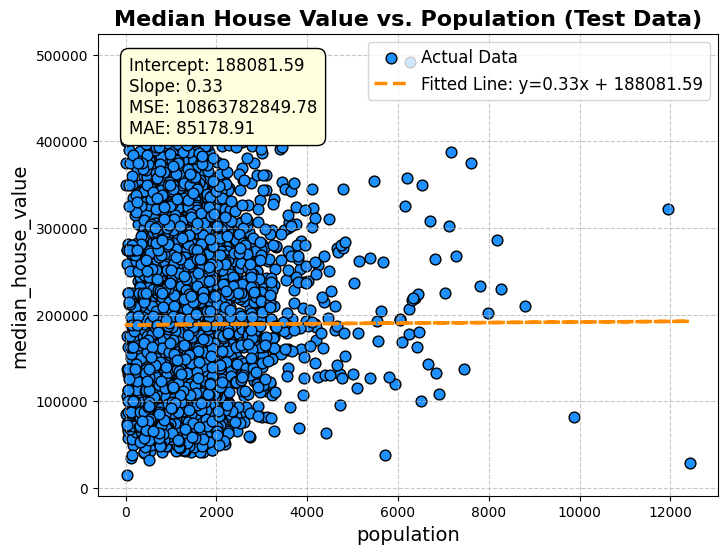

/var/folders/84/15smpvhx2g139bpl52zzz9200000gn/T/ipykernel_89067/479650061.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_model_fixed(test, "households", "median_house_value", model_households, float(households_intercept), float(households_coef), "Median House Value vs. Number of Households (Test Data)")


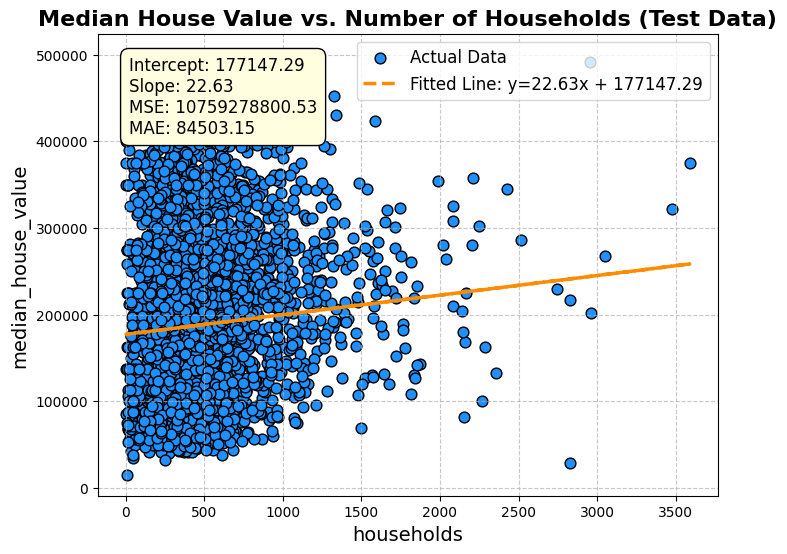

In [48]:
def plot_model_fixed(test, x_col, y_col, model, intercept, slope, title):
    plt.figure(figsize=(8,6))
    
    plt.scatter(test[x_col], test[y_col], color="dodgerblue", marker='o', s=60, label="Actual Data", edgecolor='black')
    
    y_pred = model.predict(test[[x_col]])
    plt.plot(test[x_col], y_pred, color="darkorange", linestyle='--', linewidth=2.5, label=f"Fitted Line: y={slope:.2f}x + {intercept:.2f}")

    mse = mean_squared_error(test[y_col], y_pred)
    mae = mean_absolute_error(test[y_col], y_pred)
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.7)

    textstr = f'Intercept: {intercept:.2f}\nSlope: {slope:.2f}\nMSE: {mse:.2f}\nMAE: {mae:.2f}'
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightyellow'))
    
    plt.show()

# Plot for Median House Value vs. Median Income on test data
plot_model_fixed(test, "median_income", "median_house_value", model_income, float(income_intercept), float(income_coef), "Median House Value vs. Median Income (Test Data)")

# Plot for Median House Value vs. Population on test data
plot_model_fixed(test, "population", "median_house_value", model_population, float(population_intercept), float(population_coef), "Median House Value vs. Population (Test Data)")

# Plot for Median House Value vs. Number of Households on test data
plot_model_fixed(test, "households", "median_house_value", model_households, float(households_intercept), float(households_coef), "Median House Value vs. Number of Households (Test Data)")

## Goodness of fit

### Considering the low MSE and MAE and a strong linear association with median home values, the median income model fits the best. The number of households model shows a weak but upward trend. With large error values, the population model fit the data the worst.

## Conclusion

### Considering higher income areas tend to have stronger demand for pricier properties, the median income model turned shown to be the best predictor of house prices. Although this component is less significant than income, the number of households exhibited a slight link, suggesting that locations with more households may have higher housing demand. The population model showed the lowest association, indicating that population size is a poor predictor in this context and has minimal bearing on property prices. In the end, the main variable influencing house prices is income.
